## Linear Regression Assignment

### Importing and analysing the dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary packages
import numpy as np
import pandas as pd

In [3]:
# Importing the dataset
days = pd.read_csv("day.csv")
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Analyzing the shape of the dataset
days.shape

(730, 16)

In [5]:
# Checking the datatypes of the columns
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for null values in the dataset
days.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Getting a basic idea of the data
days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Removing unnecessary columns

In [8]:
# From the given dataset, we can see that "instant" column is an index column so we drop it
days.drop(['instant'], axis = 1, inplace = True)

In [9]:
days.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# casual+registered = cnt and cnt is our target variable so we will not consider casual and registered
days.drop(['casual','registered'], axis = 1, inplace = True)
days.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# The columns "yr" and "mnth" columns are having same data as "dteday" column. So we can drop "dteday" to avoid confusion
days.drop(['dteday'],axis=1,inplace=True)
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


From the dataset, we see that season, yr, mnth, holiday, weekday, workingday, weathersit are all categorical variables. We will replace season, weekday and weathersit with appropriate values

In [13]:
days['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
days['weathersit'].replace({1:"Clear_Few Clouds", 2:"Mist_cloudy", 3:"Light rain_Light snow_Thunderstorm", 4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'}, inplace = True)
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
days['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}, inplace = True)
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
# Changing datatypes of numerical columns to appropriate types
days[['temp','atemp','hum','windspeed','cnt']] = days[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [17]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### Performing EDA

In [18]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Plotting pair plots to understand the numerical data

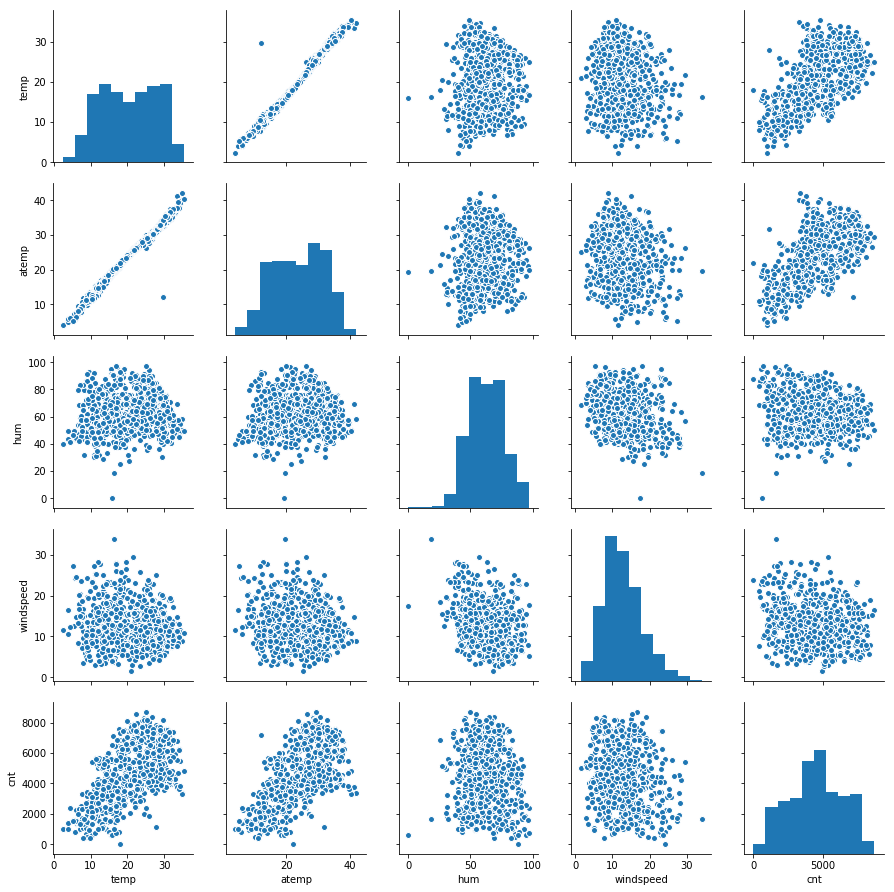

In [19]:
# Using pair plot from "seaborn" on numerical columns ('temp','atemp','hum','windspeed',"cnt")
sns.pairplot(days, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

From the above pair plot, we can infer the following points:
1. 'temp' & 'atemp' columns seem to be very highly correlated and hence each has a similar impact on the target variable
2. 'windspeed' & 'humidity' have a negative correlation with the target variable 'cnt'

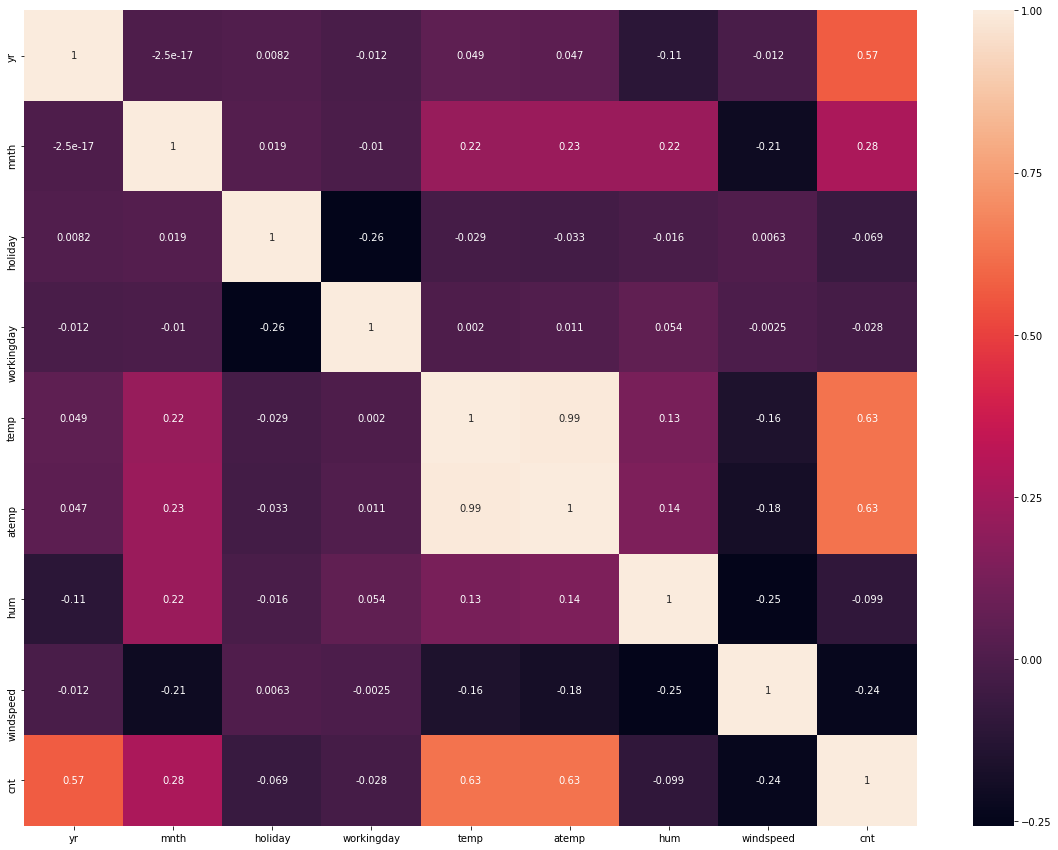

In [20]:
# Checking the above correlations with a heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(days.corr(), annot = True)
plt.show()

The above heat map confirms the high correlation of 0.99 between 'temp' & 'atemp'. Hence, we could drop either one of them

In [21]:
# Dropping 'temp' variable
days.drop(['temp'], axis = 1, inplace = True)
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


#### Plotting categorical data to understand the data better

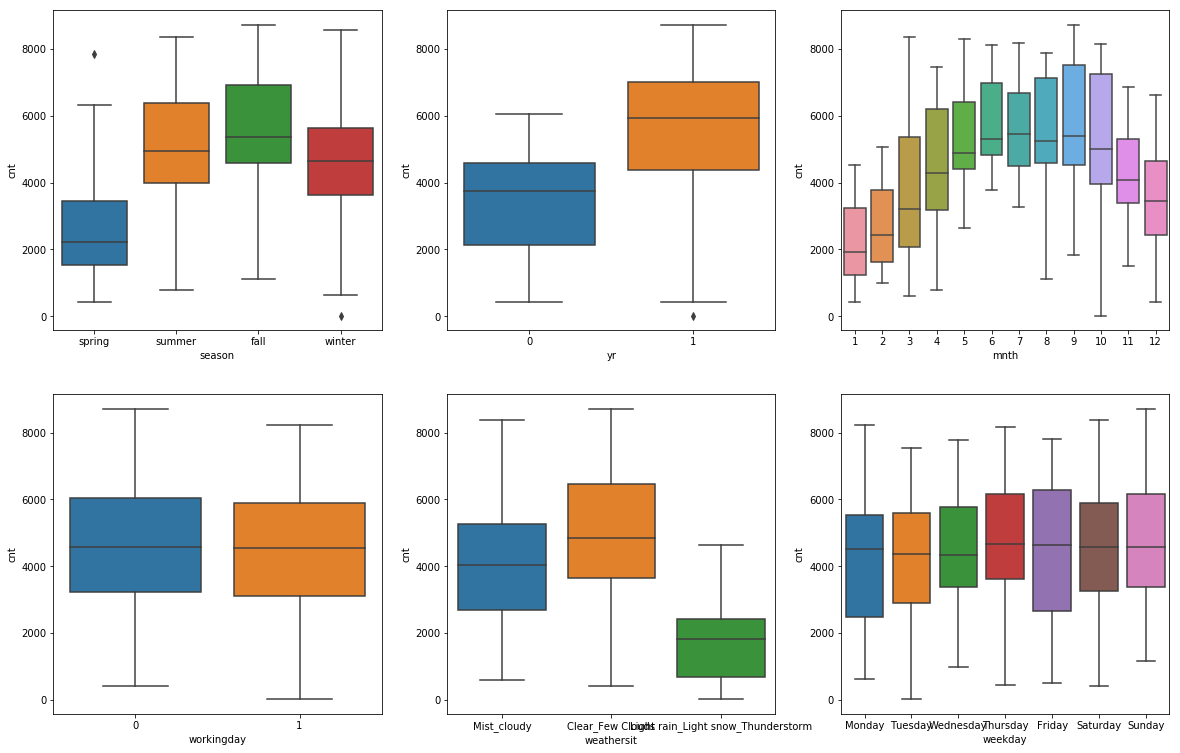

In [22]:
# Using box plots for analysing categorical data
plt.figure(figsize = (20, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = days) # season vs cnt
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = days) # yr vs cnt
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = days) # mnth vs cnt
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = days) # workingday vs cnt
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = days) # weathersit vs cnt
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = days) # weekday vs cnt
plt.show()

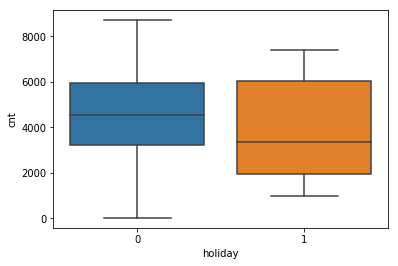

In [23]:
sns.boxplot(x = 'holiday', y = 'cnt', data = days) # holiday vs cnt
plt.show()

From the above plots, we can infer the following points:
1. We see that the number of bikes booked in 2019 were more than the year 2018
2. Also, the demand increases when the weather is “Clear” or there are “Few Clouds”.
3. The working day plots indicate that more bicycles are rent during normal working days than on weekends or holidays.
4. Demand is higher during months 3, 4, 5, 6, 7, 8, 9 and 10.
5. The "summer" and "fall" seasons show a higher demand than other seasons.

### Creating Dummy Variables

In [24]:
# Convert variables to object type
days['mnth'] = days['mnth'].astype(object)
days['season'] = days['season'].astype(object)
days['weathersit'] = days['weathersit'].astype(object)
days['weekday'] = days['weekday'].astype(object)

In [25]:
# Checking the data types
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [26]:
# Creating the dummy columns
Season = pd.get_dummies(days['season'], drop_first = True)
Weather = pd.get_dummies(days['weathersit'], drop_first = True)
Day_of_week = pd.get_dummies(days['weekday'], drop_first = True)
Month = pd.get_dummies(days['mnth'], drop_first = True)

In [27]:
# Concat them with the original dataset
days = pd.concat([days, Season], axis = 1)
days = pd.concat([days, Weather], axis = 1)
days = pd.concat([days, Day_of_week], axis = 1)
days = pd.concat([days, Month], axis = 1)

In [28]:
# Checking the data types again
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [29]:
# Deleting the orginal columns season, weathersit, weekday and mnth
days.drop(['season'], axis = 1, inplace = True)
days.drop(['weathersit'], axis = 1, inplace = True)
days.drop(['weekday'], axis = 1, inplace = True)
days.drop(['mnth'], axis = 1, inplace = True)

In [30]:
days.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the data

Now, the data is ready to be split into train and test sets. We will be splitting it using a 80:20 ratio

In [31]:
from sklearn.model_selection import train_test_split

# We specify the seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
days_train, days_test = train_test_split(days, train_size = 0.8, test_size = 0.2, random_state = 100)

In [32]:
days_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
367,1,0,1,6.31375,44.1250,24.499957,2236,1,0,0,...,0,0,0,0,0,0,0,0,0,0
648,1,0,1,21.55835,46.3333,12.166932,7570,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44,0,0,1,19.91750,37.5833,27.999836,1913,1,0,0,...,0,0,0,0,0,0,0,0,0,0
705,1,0,0,16.09790,76.4167,8.750200,5008,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,1,8.08125,41.9167,16.834286,2311,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
days_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### Scaling the numerical data

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [35]:
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
days_train[num_vars] = scaler.fit_transform(days_train[num_vars])

In [36]:
days_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
367,1,0,1,0.061963,0.454701,0.695175,0.254717,1,0,0,...,0,0,0,0,0,0,0,0,0,0
648,1,0,1,0.462175,0.477458,0.299450,0.868385,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44,0,0,1,0.419099,0.387290,0.807474,0.217556,1,0,0,...,0,0,0,0,0,0,0,0,0,0
705,1,0,0,0.318824,0.787463,0.189819,0.573631,0,0,1,...,0,0,0,0,0,0,0,0,0,1
379,1,0,1,0.108365,0.431945,0.449210,0.263346,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
days_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,...,0.090753,0.077055,0.087329,0.077055,0.075342,0.090753,0.080479,0.092466,0.080479,0.087329
std,0.500241,0.163378,0.446377,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,...,0.287504,0.266907,0.282558,0.266907,0.264169,0.287504,0.272267,0.289931,0.272267,0.282558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#CREATING X AND Y
Y_train = days_train.pop('cnt')
X_train = days_train

### Creating the Linear Regression model

In [39]:
# Importing the necessary packages
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [40]:
# Using RFE approach for feature selection
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, Y_train)

In [41]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', False, 2),
 ('Monday', False, 9),
 ('Saturday', False, 7),
 ('Sunday', False, 8),
 ('Thursday', False, 14),
 ('Tuesday', False, 10),
 ('Wednesday', False, 11),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 4),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 12),
 (12, False, 13)]

In [42]:
X_train.columns[~rfe.support_]

Index([ 'workingday',      'summer', 'Mist_cloudy',      'Monday',
          'Saturday',      'Sunday',    'Thursday',     'Tuesday',
         'Wednesday',             2,             7,            11,
                  12],
      dtype='object')

In [43]:
columns = X_train.columns[rfe.support_]
columns

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [44]:
X_train_rfe = X_train[columns]

#### Building the model using statsmodel

In [45]:
# Importing the package and creating the model
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(Y_train, X_train_lm).fit()

In [46]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.26e-213
Time:                        22:45:32   Log-Likelihood:                 574.06
No. Observations:                 584   AIC:                            -1116.
Df Residuals:                     568   BIC:                            -1046.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3534      0.032     11.035      0.000       0.290       0.416
yr                                     0.2271      0.008     29.502      0.000       0.212       0.242
holiday                               -0.0848      0.024     -3.602      0.000      -0.131      -0.039
atemp                                  0.4817      0.032     15.020      0.000       0.419       0.545
hum                                   -0.2767      0.030     -9.177      0.000      -0.336      -0.217
windspeed                             -0.1765      0.025     -7.141      0.000      -0.225      -0.128
spring                                -0.0836      0.018     -4.650      0.000      -0.119      -0.048
winter                                 0.0850      0.017      5.060      0.000       0.052       0.118
Light rain_Light snow_Thunderstorm    -0.2011      0.025     -8.143      0.000      -0.250      -0.153
3                                      0.0574      0.015      3.924      0.000       0.029       0.086
4                                      0.0543      0.019      2.855      0.004       0.017       0.092
5                                      0.0882      0.018      5.013      0.000       0.054       0.123
6                                      0.0667      0.018      3.683      0.000       0.031       0.102
8                                      0.0565      0.017      3.252      0.001       0.022       0.091
9                                      0.1169      0.017      7.063      0.000       0.084       0.149
10                                     0.0595      0.017      3.602      0.000       0.027       0.092
==============================================================================
Omnibus:                       92.603   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.311
Skew:                          -0.807   Prob(JB):                     1.78e-52
Kurtosis:                       5.681   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check for the VIF values of the feature variables.

In [47]:
# Importing the package 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.97
2,atemp,13.69
4,windspeed,4.60
6,winter,3.59
5,spring,3.52
0,yr,2.08
12,8,1.88
10,5,1.81
14,10,1.69
11,6,1.68


In [49]:
# Column "hum" has a very high VIF and hence dropping it
X_train_rfe = X_train_rfe.drop(['hum'],axis=1)
X_train_rfe.head()

,yr,holiday,atemp,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,4,5,6,8,9,10
367,1,0,0.061963,0.695175,1,0,0,0,0,0,0,0,0,0
648,1,0,0.462175,0.299450,0,1,0,0,0,0,0,0,0,1
44,0,0,0.419099,0.807474,1,0,0,0,0,0,0,0,0,0
705,1,0,0.318824,0.189819,0,1,0,0,0,0,0,0,0,0
379,1,0,0.108365,0.449210,1,0,0,0,0,0,0,0,0,0


In [50]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(Y_train, X_train_lm).fit()

In [51]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     178.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.24e-197
Time:                        22:45:48   Log-Likelihood:                 533.70
No. Observations:                 584   AIC:                            -1037.
Df Residuals:                     569   BIC:                            -971.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.1783      0.028      6.475      0.000       0.124       0.232
yr                                     0.2340      0.008     28.516      0.000       0.218       0.250
holiday                               -0.0799      0.025     -3.170      0.002      -0.129      -0.030
atemp                                  0.4538      0.034     13.277      0.000       0.387       0.521
windspeed                             -0.1222      0.026     -4.757      0.000      -0.173      -0.072
spring                                -0.0897      0.019     -4.662      0.000      -0.128      -0.052
winter                                 0.0699      0.018      3.909      0.000       0.035       0.105
Light rain_Light snow_Thunderstorm    -0.2622      0.025    -10.300      0.000      -0.312      -0.212
3                                      0.0601      0.016      3.840      0.000       0.029       0.091
4                                      0.0534      0.020      2.622      0.009       0.013       0.093
5                                      0.0631      0.019      3.391      0.001       0.027       0.100
6                                      0.0768      0.019      3.970      0.000       0.039       0.115
8                                      0.0473      0.019      2.545      0.011       0.011       0.084
9                                      0.0988      0.018      5.619      0.000       0.064       0.133
10                                     0.0513      0.018      2.904      0.004       0.017       0.086
==============================================================================
Omnibus:                       94.575   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.719
Skew:                          -0.869   Prob(JB):                     3.90e-47
Kurtosis:                       5.401   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.47
3,windspeed,4.60
5,winter,2.35
4,spring,2.10
0,yr,2.08
11,8,1.83
10,6,1.68
13,10,1.68
9,5,1.61
8,4,1.52


In [53]:
# Column "atemp" has a very high VIF and hence dropping it
X_train_rfe = X_train_rfe.drop(['atemp'],axis=1)
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,4,5,6,8,9,10
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,1,0,0,0,0,0,0,0,1
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,1,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0


In [54]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(Y_train, X_train_lm).fit()

In [55]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     136.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.68e-165
Time:                        22:45:57   Log-Likelihood:                 454.90
No. Observations:                 584   AIC:                            -881.8
Df Residuals:                     570   BIC:                            -820.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4846      0.017     28.225      0.000       0.451       0.518
yr                                     0.2445      0.009     26.189      0.000       0.226       0.263
holiday                               -0.0772      0.029     -2.679      0.008      -0.134      -0.021
windspeed                             -0.1545      0.029     -5.284      0.000      -0.212      -0.097
spring                                -0.2588      0.016    -15.692      0.000      -0.291      -0.226
winter                                -0.0538      0.017     -3.084      0.002      -0.088      -0.020
Light rain_Light snow_Thunderstorm    -0.2813      0.029     -9.680      0.000      -0.338      -0.224
3                                      0.0535      0.018      2.991      0.003       0.018       0.089
4                                     -0.0226      0.022     -1.012      0.312      -0.066       0.021
5                                      0.0491      0.021      2.311      0.021       0.007       0.091
6                                      0.1037      0.022      4.711      0.000       0.060       0.147
8                                      0.0828      0.021      3.936      0.000       0.041       0.124
9                                      0.1275      0.020      6.390      0.000       0.088       0.167
10                                     0.1101      0.020      5.635      0.000       0.072       0.148
==============================================================================
Omnibus:                       85.862   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.281
Skew:                          -0.809   Prob(JB):                     3.55e-41
Kurtosis:                       5.244   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.96
4,winter,2.24
3,spring,2.10
0,yr,1.91
12,10,1.63
7,4,1.45
6,3,1.27
8,5,1.27
10,8,1.26
9,6,1.24


In [57]:
# Column "4" has a very high VIF and p-value hence dropping it
X_train_rfe = X_train_rfe.drop([4],axis=1)
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10
367,1,0,0.695175,1,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,1,0,0,0,0,0,0,1
44,0,0,0.807474,1,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,1,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0


In [58]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(Y_train, X_train_lm).fit()

In [59]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.58e-166
Time:                        22:46:24   Log-Likelihood:                 454.37
No. Observations:                 584   AIC:                            -882.7
Df Residuals:                     571   BIC:                            -825.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4772      0.015     30.792      0.000       0.447       0.508
yr                                     0.2442      0.009     26.169      0.000       0.226       0.263
holiday                               -0.0764      0.029     -2.651      0.008      -0.133      -0.020
windspeed                             -0.1599      0.029     -5.556      0.000      -0.216      -0.103
spring                                -0.2502      0.014    -17.725      0.000      -0.278      -0.222
winter                                -0.0457      0.015     -2.951      0.003      -0.076      -0.015
Light rain_Light snow_Thunderstorm    -0.2803      0.029     -9.649      0.000      -0.337      -0.223
3                                      0.0575      0.017      3.293      0.001       0.023       0.092
5                                      0.0583      0.019      3.039      0.002       0.021       0.096
6                                      0.1129      0.020      5.637      0.000       0.074       0.152
8                                      0.0919      0.019      4.839      0.000       0.055       0.129
9                                      0.1344      0.019      7.155      0.000       0.097       0.171
10                                     0.1110      0.020      5.688      0.000       0.073       0.149
==============================================================================
Omnibus:                       84.180   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.287
Skew:                          -0.801   Prob(JB):                     1.17e-39
Kurtosis:                       5.191   Cond. No.                         9.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.02
4,winter,2.06
0,yr,1.84
3,spring,1.82
11,10,1.62
6,3,1.25
7,5,1.18
9,8,1.18
8,6,1.17
10,9,1.12


#### Adding columns to see if it improves the model

In [61]:
# Adding the column "Sunday"
X_train_rfe['Sunday'] = X_train['Sunday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,Sunday
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,1,0,0,0,0,0,0,1,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,1,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0


In [62]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(Y_train, X_train_lm).fit()

In [63]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.08e-165
Time:                        22:46:33   Log-Likelihood:                 455.16
No. Observations:                 584   AIC:                            -882.3
Df Residuals:                     570   BIC:                            -821.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4749      0.016     30.444      0.000       0.444       0.506
yr                                     0.2442      0.009     26.185      0.000       0.226       0.263
holiday                               -0.0751      0.029     -2.607      0.009      -0.132      -0.019
windspeed                             -0.1607      0.029     -5.587      0.000      -0.217      -0.104
spring                                -0.2499      0.014    -17.705      0.000      -0.278      -0.222
winter                                -0.0452      0.015     -2.923      0.004      -0.076      -0.015
Light rain_Light snow_Thunderstorm    -0.2790      0.029     -9.604      0.000      -0.336      -0.222
3                                      0.0572      0.017      3.279      0.001       0.023       0.092
5                                      0.0592      0.019      3.083      0.002       0.021       0.097
6                                      0.1132      0.020      5.651      0.000       0.074       0.152
8                                      0.0918      0.019      4.836      0.000       0.055       0.129
9                                      0.1337      0.019      7.120      0.000       0.097       0.171
10                                     0.1113      0.020      5.708      0.000       0.073       0.150
Sunday                                 0.0172      0.014      1.240      0.216      -0.010       0.044
==============================================================================
Omnibus:                       85.802   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.495
Skew:                          -0.822   Prob(JB):                     1.05e-39
Kurtosis:                       5.162   Cond. No.                         9.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Sunday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [65]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(Y_train, X_train_lm).fit()

In [66]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.58e-166
Time:                        22:46:43   Log-Likelihood:                 454.37
No. Observations:                 584   AIC:                            -882.7
Df Residuals:                     571   BIC:                            -825.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4772      0.015     30.792      0.000       0.447       0.508
yr                                     0.2442      0.009     26.169      0.000       0.226       0.263
holiday                               -0.0764      0.029     -2.651      0.008      -0.133      -0.020
windspeed                             -0.1599      0.029     -5.556      0.000      -0.216      -0.103
spring                                -0.2502      0.014    -17.725      0.000      -0.278      -0.222
winter                                -0.0457      0.015     -2.951      0.003      -0.076      -0.015
Light rain_Light snow_Thunderstorm    -0.2803      0.029     -9.649      0.000      -0.337      -0.223
3                                      0.0575      0.017      3.293      0.001       0.023       0.092
5                                      0.0583      0.019      3.039      0.002       0.021       0.096
6                                      0.1129      0.020      5.637      0.000       0.074       0.152
8                                      0.0919      0.019      4.839      0.000       0.055       0.129
9                                      0.1344      0.019      7.155      0.000       0.097       0.171
10                                     0.1110      0.020      5.688      0.000       0.073       0.149
==============================================================================
Omnibus:                       84.180   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.287
Skew:                          -0.801   Prob(JB):                     1.17e-39
Kurtosis:                       5.191   Cond. No.                         9.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Adding "workingday" column
X_train_rfe['workingday'] = X_train['workingday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,workingday
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,1
648,1,0,0.299450,0,1,0,0,0,0,0,0,1,1
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,1
705,1,0,0.189819,0,1,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,1


In [68]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_7 = sm.OLS(Y_train, X_train_lm).fit()

In [69]:
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     137.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          9.92e-166
Time:                        22:46:47   Log-Likelihood:                 455.92
No. Observations:                 584   AIC:                            -883.8
Df Residuals:                     570   BIC:                            -822.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4911      0.017     28.181      0.000       0.457       0.525
yr                                     0.2442      0.009     26.214      0.000       0.226       0.262
holiday                               -0.0906      0.030     -3.030      0.003      -0.149      -0.032
windspeed                             -0.1599      0.029     -5.567      0.000      -0.216      -0.103
spring                                -0.2499      0.014    -17.732      0.000      -0.278      -0.222
winter                                -0.0451      0.015     -2.919      0.004      -0.075      -0.015
Light rain_Light snow_Thunderstorm    -0.2804      0.029     -9.671      0.000      -0.337      -0.223
3                                      0.0565      0.017      3.241      0.001       0.022       0.091
5                                      0.0592      0.019      3.089      0.002       0.022       0.097
6                                      0.1133      0.020      5.663      0.000       0.074       0.153
8                                      0.0911      0.019      4.806      0.000       0.054       0.128
9                                      0.1334      0.019      7.109      0.000       0.097       0.170
10                                     0.1118      0.019      5.738      0.000       0.074       0.150
workingday                            -0.0189      0.011     -1.740      0.082      -0.040       0.002
==============================================================================
Omnibus:                       85.086   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.049
Skew:                          -0.815   Prob(JB):                     2.17e-39
Kurtosis:                       5.158   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# workingday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [71]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_8 = sm.OLS(Y_train, X_train_lm).fit()

In [72]:
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     147.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.58e-166
Time:                        22:46:50   Log-Likelihood:                 454.37
No. Observations:                 584   AIC:                            -882.7
Df Residuals:                     571   BIC:                            -825.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4772      0.015     30.792      0.000       0.447       0.508
yr                                     0.2442      0.009     26.169      0.000       0.226       0.263
holiday                               -0.0764      0.029     -2.651      0.008      -0.133      -0.020
windspeed                             -0.1599      0.029     -5.556      0.000      -0.216      -0.103
spring                                -0.2502      0.014    -17.725      0.000      -0.278      -0.222
winter                                -0.0457      0.015     -2.951      0.003      -0.076      -0.015
Light rain_Light snow_Thunderstorm    -0.2803      0.029     -9.649      0.000      -0.337      -0.223
3                                      0.0575      0.017      3.293      0.001       0.023       0.092
5                                      0.0583      0.019      3.039      0.002       0.021       0.096
6                                      0.1129      0.020      5.637      0.000       0.074       0.152
8                                      0.0919      0.019      4.839      0.000       0.055       0.129
9                                      0.1344      0.019      7.155      0.000       0.097       0.171
10                                     0.1110      0.020      5.688      0.000       0.073       0.149
==============================================================================
Omnibus:                       84.180   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.287
Skew:                          -0.801   Prob(JB):                     1.17e-39
Kurtosis:                       5.191   Cond. No.                         9.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# Adding the month "7" column
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,1,0,0,0,0,0,0,1,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,1,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0


In [74]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_9 = sm.OLS(Y_train, X_train_lm).fit()

In [75]:
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     150.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.03e-174
Time:                        22:46:54   Log-Likelihood:                 477.24
No. Observations:                 584   AIC:                            -926.5
Df Residuals:                     570   BIC:                            -865.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4066      0.018     22.400      0.000       0.371       0.442
yr                                     0.2443      0.009     27.203      0.000       0.227       0.262
holiday                               -0.0726      0.028     -2.619      0.009      -0.127      -0.018
windspeed                             -0.1291      0.028     -4.601      0.000      -0.184      -0.074
spring                                -0.1970      0.016    -12.572      0.000      -0.228      -0.166
winter                                 0.0097      0.017      0.571      0.568      -0.024       0.043
Light rain_Light snow_Thunderstorm    -0.2803      0.028    -10.025      0.000      -0.335      -0.225
3                                      0.0809      0.017      4.714      0.000       0.047       0.115
5                                      0.1196      0.021      5.822      0.000       0.079       0.160
6                                      0.1743      0.021      8.191      0.000       0.133       0.216
8                                      0.1539      0.020      7.537      0.000       0.114       0.194
9                                      0.1827      0.019      9.410      0.000       0.145       0.221
10                                     0.1170      0.019      6.221      0.000       0.080       0.154
7                                      0.1464      0.021      6.815      0.000       0.104       0.189
==============================================================================
Omnibus:                       93.436   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.343
Skew:                          -0.823   Prob(JB):                     1.30e-51
Kurtosis:                       5.631   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.27
4,winter,2.13
3,spring,1.93
0,yr,1.92
11,10,1.63
6,3,1.26
7,5,1.22
9,8,1.22
8,6,1.20
12,7,1.17


Column "7" seems to improve the model and hence keeping it

In [77]:
# Adding column "11"
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7,11
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,1,0,0,0,0,0,0,1,0,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,1,0,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0,0


In [78]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_10 = sm.OLS(Y_train, X_train_lm).fit()

In [79]:
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     139.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.26e-173
Time:                        22:46:59   Log-Likelihood:                 477.26
No. Observations:                 584   AIC:                            -924.5
Df Residuals:                     569   BIC:                            -859.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4064      0.018     22.326      0.000       0.371       0.442
yr                                     0.2444      0.009     27.173      0.000       0.227       0.262
holiday                               -0.0732      0.028     -2.623      0.009      -0.128      -0.018
windspeed                             -0.1294      0.028     -4.601      0.000      -0.185      -0.074
spring                                -0.1967      0.016    -12.477      0.000      -0.228      -0.166
winter                                 0.0075      0.020      0.371      0.711      -0.032       0.047
Light rain_Light snow_Thunderstorm    -0.2804      0.028    -10.019      0.000      -0.335      -0.225
3                                      0.0810      0.017      4.715      0.000       0.047       0.115
5                                      0.1199      0.021      5.817      0.000       0.079       0.160
6                                      0.1746      0.021      8.180      0.000       0.133       0.217
8                                      0.1542      0.020      7.527      0.000       0.114       0.194
9                                      0.1836      0.020      9.221      0.000       0.145       0.223
10                                     0.1195      0.023      5.289      0.000       0.075       0.164
7                                      0.1467      0.022      6.807      0.000       0.104       0.189
11                                     0.0047      0.023      0.202      0.840      -0.041       0.051
==============================================================================
Omnibus:                       93.750   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.522
Skew:                          -0.825   Prob(JB):                     7.20e-52
Kurtosis:                       5.638   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# 11 has high p-value so we drop it
X_train_rfe=X_train_rfe.drop([11],axis=1)

In [81]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_11 = sm.OLS(Y_train, X_train_lm).fit()

In [82]:
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     150.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.03e-174
Time:                        22:47:02   Log-Likelihood:                 477.24
No. Observations:                 584   AIC:                            -926.5
Df Residuals:                     570   BIC:                            -865.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4066      0.018     22.400      0.000       0.371       0.442
yr                                     0.2443      0.009     27.203      0.000       0.227       0.262
holiday                               -0.0726      0.028     -2.619      0.009      -0.127      -0.018
windspeed                             -0.1291      0.028     -4.601      0.000      -0.184      -0.074
spring                                -0.1970      0.016    -12.572      0.000      -0.228      -0.166
winter                                 0.0097      0.017      0.571      0.568      -0.024       0.043
Light rain_Light snow_Thunderstorm    -0.2803      0.028    -10.025      0.000      -0.335      -0.225
3                                      0.0809      0.017      4.714      0.000       0.047       0.115
5                                      0.1196      0.021      5.822      0.000       0.079       0.160
6                                      0.1743      0.021      8.191      0.000       0.133       0.216
8                                      0.1539      0.020      7.537      0.000       0.114       0.194
9                                      0.1827      0.019      9.410      0.000       0.145       0.221
10                                     0.1170      0.019      6.221      0.000       0.080       0.154
7                                      0.1464      0.021      6.815      0.000       0.104       0.189
==============================================================================
Omnibus:                       93.436   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.343
Skew:                          -0.823   Prob(JB):                     1.30e-51
Kurtosis:                       5.631   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Adding column "2"
X_train_rfe[2] = X_train[2]
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7,2
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,1,0,0,0,0,0,0,1,0,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0,1
705,1,0,0.189819,0,1,0,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0,0


In [84]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_12 = sm.OLS(Y_train, X_train_lm).fit()

In [85]:
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     140.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.22e-174
Time:                        22:47:05   Log-Likelihood:                 479.06
No. Observations:                 584   AIC:                            -928.1
Df Residuals:                     569   BIC:                            -862.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4050      0.018     22.339      0.000       0.369       0.441
yr                                     0.2444      0.009     27.278      0.000       0.227       0.262
holiday                               -0.0711      0.028     -2.568      0.010      -0.125      -0.017
windspeed                             -0.1317      0.028     -4.700      0.000      -0.187      -0.077
spring                                -0.2082      0.017    -12.444      0.000      -0.241      -0.175
winter                                 0.0117      0.017      0.689      0.491      -0.022       0.045
Light rain_Light snow_Thunderstorm    -0.2806      0.028    -10.060      0.000      -0.335      -0.226
3                                      0.0909      0.018      5.071      0.000       0.056       0.126
5                                      0.1219      0.021      5.937      0.000       0.082       0.162
6                                      0.1766      0.021      8.304      0.000       0.135       0.218
8                                      0.1561      0.020      7.651      0.000       0.116       0.196
9                                      0.1844      0.019      9.506      0.000       0.146       0.222
10                                     0.1173      0.019      6.251      0.000       0.080       0.154
7                                      0.1486      0.021      6.922      0.000       0.106       0.191
2                                      0.0386      0.021      1.883      0.060      -0.002       0.079
==============================================================================
Omnibus:                       93.933   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.380
Skew:                          -0.815   Prob(JB):                     8.58e-54
Kurtosis:                       5.718   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# 2 has high p-value so we drop it
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [87]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_13 = sm.OLS(Y_train, X_train_lm).fit()

In [88]:
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     150.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.03e-174
Time:                        22:47:08   Log-Likelihood:                 477.24
No. Observations:                 584   AIC:                            -926.5
Df Residuals:                     570   BIC:                            -865.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4066      0.018     22.400      0.000       0.371       0.442
yr                                     0.2443      0.009     27.203      0.000       0.227       0.262
holiday                               -0.0726      0.028     -2.619      0.009      -0.127      -0.018
windspeed                             -0.1291      0.028     -4.601      0.000      -0.184      -0.074
spring                                -0.1970      0.016    -12.572      0.000      -0.228      -0.166
winter                                 0.0097      0.017      0.571      0.568      -0.024       0.043
Light rain_Light snow_Thunderstorm    -0.2803      0.028    -10.025      0.000      -0.335      -0.225
3                                      0.0809      0.017      4.714      0.000       0.047       0.115
5                                      0.1196      0.021      5.822      0.000       0.079       0.160
6                                      0.1743      0.021      8.191      0.000       0.133       0.216
8                                      0.1539      0.020      7.537      0.000       0.114       0.194
9                                      0.1827      0.019      9.410      0.000       0.145       0.221
10                                     0.1170      0.019      6.221      0.000       0.080       0.154
7                                      0.1464      0.021      6.815      0.000       0.104       0.189
==============================================================================
Omnibus:                       93.436   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.343
Skew:                          -0.823   Prob(JB):                     1.30e-51
Kurtosis:                       5.631   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Adding column 12
X_train_rfe[12] = X_train[12]
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7,12
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,1,0,0,0,0,0,0,1,0,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,1,0,0,0,0,0,0,0,0,1
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0,0


In [90]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_14 = sm.OLS(Y_train, X_train_lm).fit()

In [91]:
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.98e-174
Time:                        22:47:11   Log-Likelihood:                 478.03
No. Observations:                 584   AIC:                            -926.1
Df Residuals:                     569   BIC:                            -860.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4096      0.018     22.382      0.000       0.374       0.446
yr                                     0.2443      0.009     27.212      0.000       0.227       0.262
holiday                               -0.0733      0.028     -2.644      0.008      -0.128      -0.019
windspeed                             -0.1320      0.028     -4.691      0.000      -0.187      -0.077
spring                                -0.1954      0.016    -12.430      0.000      -0.226      -0.164
winter                                 0.0162      0.018      0.912      0.362      -0.019       0.051
Light rain_Light snow_Thunderstorm    -0.2790      0.028     -9.979      0.000      -0.334      -0.224
3                                      0.0780      0.017      4.505      0.000       0.044       0.112
5                                      0.1176      0.021      5.707      0.000       0.077       0.158
6                                      0.1723      0.021      8.074      0.000       0.130       0.214
8                                      0.1518      0.020      7.412      0.000       0.112       0.192
9                                      0.1789      0.020      9.100      0.000       0.140       0.217
10                                     0.1083      0.020      5.405      0.000       0.069       0.148
7                                      0.1443      0.022      6.696      0.000       0.102       0.187
12                                    -0.0225      0.018     -1.242      0.215      -0.058       0.013
==============================================================================
Omnibus:                       93.928   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.044
Skew:                          -0.823   Prob(JB):                     2.04e-52
Kurtosis:                       5.659   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# 12 has high p-value so we drop it
X_train_rfe=X_train_rfe.drop([12],axis=1)

In [93]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_15 = sm.OLS(Y_train, X_train_lm).fit()

In [94]:
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     150.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.03e-174
Time:                        22:47:14   Log-Likelihood:                 477.24
No. Observations:                 584   AIC:                            -926.5
Df Residuals:                     570   BIC:                            -865.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4066      0.018     22.400      0.000       0.371       0.442
yr                                     0.2443      0.009     27.203      0.000       0.227       0.262
holiday                               -0.0726      0.028     -2.619      0.009      -0.127      -0.018
windspeed                             -0.1291      0.028     -4.601      0.000      -0.184      -0.074
spring                                -0.1970      0.016    -12.572      0.000      -0.228      -0.166
winter                                 0.0097      0.017      0.571      0.568      -0.024       0.043
Light rain_Light snow_Thunderstorm    -0.2803      0.028    -10.025      0.000      -0.335      -0.225
3                                      0.0809      0.017      4.714      0.000       0.047       0.115
5                                      0.1196      0.021      5.822      0.000       0.079       0.160
6                                      0.1743      0.021      8.191      0.000       0.133       0.216
8                                      0.1539      0.020      7.537      0.000       0.114       0.194
9                                      0.1827      0.019      9.410      0.000       0.145       0.221
10                                     0.1170      0.019      6.221      0.000       0.080       0.154
7                                      0.1464      0.021      6.815      0.000       0.104       0.189
==============================================================================
Omnibus:                       93.436   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.343
Skew:                          -0.823   Prob(JB):                     1.30e-51
Kurtosis:                       5.631   Cond. No.                         11.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Adding column "Monday"
X_train_rfe['Monday'] = X_train['Monday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7,Monday
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,1,0,0,0,0,0,0,1,0,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,1,0,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0,0


In [96]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_16 = sm.OLS(Y_train, X_train_lm).fit()

In [97]:
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.44e-174
Time:                        22:47:17   Log-Likelihood:                 479.50
No. Observations:                 584   AIC:                            -929.0
Df Residuals:                     569   BIC:                            -863.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4104      0.018     22.565      0.000       0.375       0.446
yr                                     0.2438      0.009     27.218      0.000       0.226       0.261
holiday                               -0.0771      0.028     -2.782      0.006      -0.132      -0.023
windspeed                             -0.1272      0.028     -4.546      0.000      -0.182      -0.072
spring                                -0.1965      0.016    -12.579      0.000      -0.227      -0.166
winter                                 0.0101      0.017      0.598      0.550      -0.023       0.043
Light rain_Light snow_Thunderstorm    -0.2799      0.028    -10.041      0.000      -0.335      -0.225
3                                      0.0793      0.017      4.630      0.000       0.046       0.113
5                                      0.1181      0.021      5.762      0.000       0.078       0.158
6                                      0.1749      0.021      8.243      0.000       0.133       0.217
8                                      0.1538      0.020      7.557      0.000       0.114       0.194
9                                      0.1827      0.019      9.437      0.000       0.145       0.221
10                                     0.1169      0.019      6.235      0.000       0.080       0.154
7                                      0.1479      0.021      6.899      0.000       0.106       0.190
Monday                                -0.0260      0.012     -2.102      0.036      -0.050      -0.002
==============================================================================
Omnibus:                       89.747   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.564
Skew:                          -0.786   Prob(JB):                     1.42e-50
Kurtosis:                       5.639   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.31
4,winter,2.15
3,spring,1.94
0,yr,1.92
11,10,1.63
6,3,1.26
7,5,1.22
9,8,1.22
8,6,1.21
12,7,1.19


The column "Monday" seems to improve the model and hence keeping it

In [99]:
# winter has high p-value so we drop it
X_train_rfe=X_train_rfe.drop('winter',axis=1)

In [100]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_17 = sm.OLS(Y_train, X_train_lm).fit()

In [101]:
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.37e-175
Time:                        22:47:22   Log-Likelihood:                 479.32
No. Observations:                 584   AIC:                            -930.6
Df Residuals:                     570   BIC:                            -869.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4173      0.014     29.636      0.000       0.390       0.445
yr                                     0.2437      0.009     27.228      0.000       0.226       0.261
holiday                               -0.0770      0.028     -2.778      0.006      -0.131      -0.023
windspeed                             -0.1299      0.028     -4.708      0.000      -0.184      -0.076
spring                                -0.2018      0.013    -15.708      0.000      -0.227      -0.177
Light rain_Light snow_Thunderstorm    -0.2797      0.028    -10.041      0.000      -0.334      -0.225
3                                      0.0770      0.017      4.616      0.000       0.044       0.110
5                                      0.1121      0.018      6.289      0.000       0.077       0.147
6                                      0.1689      0.019      9.064      0.000       0.132       0.205
8                                      0.1477      0.018      8.396      0.000       0.113       0.182
9                                      0.1791      0.018      9.740      0.000       0.143       0.215
10                                     0.1209      0.017      6.917      0.000       0.087       0.155
7                                      0.1417      0.019      7.537      0.000       0.105       0.179
Monday                                -0.0260      0.012     -2.097      0.036      -0.050      -0.002
==============================================================================
Omnibus:                       90.309   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.676
Skew:                          -0.795   Prob(JB):                     3.64e-50
Kurtosis:                       5.613   Cond. No.                         9.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.92
0,yr,1.83
3,spring,1.77
5,3,1.25
10,10,1.20
12,Monday,1.18
6,5,1.17
8,8,1.17
7,6,1.16
11,7,1.14


In [103]:
# Adding column "Tuesday" 
X_train_rfe['Tuesday'] = X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7,Monday,Tuesday
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,0,0,0,0,0,0,1,0,0,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,0,0,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0,1


In [104]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_18 = sm.OLS(Y_train, X_train_lm).fit()

In [105]:
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.38e-176
Time:                        22:47:28   Log-Likelihood:                 483.11
No. Observations:                 584   AIC:                            -936.2
Df Residuals:                     569   BIC:                            -870.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4235      0.014     29.853      0.000       0.396       0.451
yr                                     0.2436      0.009     27.366      0.000       0.226       0.261
holiday                               -0.0774      0.028     -2.809      0.005      -0.132      -0.023
windspeed                             -0.1284      0.027     -4.677      0.000      -0.182      -0.074
spring                                -0.2017      0.013    -15.789      0.000      -0.227      -0.177
Light rain_Light snow_Thunderstorm    -0.2832      0.028    -10.214      0.000      -0.338      -0.229
3                                      0.0761      0.017      4.590      0.000       0.044       0.109
5                                      0.1114      0.018      6.285      0.000       0.077       0.146
6                                      0.1694      0.019      9.144      0.000       0.133       0.206
8                                      0.1459      0.018      8.336      0.000       0.112       0.180
9                                      0.1787      0.018      9.774      0.000       0.143       0.215
10                                     0.1213      0.017      6.980      0.000       0.087       0.155
7                                      0.1427      0.019      7.631      0.000       0.106       0.179
Monday                                -0.0324      0.013     -2.587      0.010      -0.057      -0.008
Tuesday                               -0.0337      0.012     -2.727      0.007      -0.058      -0.009
==============================================================================
Omnibus:                       91.332   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.491
Skew:                          -0.800   Prob(JB):                     3.27e-51
Kurtosis:                       5.644   Cond. No.                         9.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.99
0,yr,1.83
3,spring,1.78
5,3,1.25
12,Monday,1.21
13,Tuesday,1.21
10,10,1.20
6,5,1.17
7,6,1.17
8,8,1.17


The column "Tuesday" seems to improve the model and hence keeping it

In [107]:
# Adding column "Wednesday"
X_train_rfe['Wednesday'] = X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7,Monday,Tuesday,Wednesday
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,0,0,0,0,0,0,1,0,0,0,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0,0,1
705,1,0,0.189819,0,0,0,0,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0,1,0


In [108]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_19 = sm.OLS(Y_train, X_train_lm).fit()

In [109]:
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.42e-175
Time:                        22:47:34   Log-Likelihood:                 484.48
No. Observations:                 584   AIC:                            -937.0
Df Residuals:                     568   BIC:                            -867.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4281      0.014     29.647      0.000       0.400       0.456
yr                                     0.2435      0.009     27.392      0.000       0.226       0.261
holiday                               -0.0683      0.028     -2.431      0.015      -0.123      -0.013
windspeed                             -0.1290      0.027     -4.706      0.000      -0.183      -0.075
spring                                -0.2014      0.013    -15.780      0.000      -0.226      -0.176
Light rain_Light snow_Thunderstorm    -0.2838      0.028    -10.247      0.000      -0.338      -0.229
3                                      0.0753      0.017      4.545      0.000       0.043       0.108
5                                      0.1117      0.018      6.310      0.000       0.077       0.146
6                                      0.1686      0.019      9.111      0.000       0.132       0.205
8                                      0.1457      0.017      8.334      0.000       0.111       0.180
9                                      0.1777      0.018      9.724      0.000       0.142       0.214
10                                     0.1225      0.017      7.051      0.000       0.088       0.157
7                                      0.1414      0.019      7.563      0.000       0.105       0.178
Monday                                -0.0366      0.013     -2.865      0.004      -0.062      -0.012
Tuesday                               -0.0382      0.013     -3.021      0.003      -0.063      -0.013
Wednesday                             -0.0225      0.014     -1.637      0.102      -0.049       0.004
==============================================================================
Omnibus:                       89.213   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.145
Skew:                          -0.801   Prob(JB):                     1.91e-47
Kurtosis:                       5.505   Cond. No.                         9.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Wednesday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop('Wednesday',axis=1)

In [111]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_20 = sm.OLS(Y_train, X_train_lm).fit()

In [112]:
lr_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.38e-176
Time:                        22:47:37   Log-Likelihood:                 483.11
No. Observations:                 584   AIC:                            -936.2
Df Residuals:                     569   BIC:                            -870.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4235      0.014     29.853      0.000       0.396       0.451
yr                                     0.2436      0.009     27.366      0.000       0.226       0.261
holiday                               -0.0774      0.028     -2.809      0.005      -0.132      -0.023
windspeed                             -0.1284      0.027     -4.677      0.000      -0.182      -0.074
spring                                -0.2017      0.013    -15.789      0.000      -0.227      -0.177
Light rain_Light snow_Thunderstorm    -0.2832      0.028    -10.214      0.000      -0.338      -0.229
3                                      0.0761      0.017      4.590      0.000       0.044       0.109
5                                      0.1114      0.018      6.285      0.000       0.077       0.146
6                                      0.1694      0.019      9.144      0.000       0.133       0.206
8                                      0.1459      0.018      8.336      0.000       0.112       0.180
9                                      0.1787      0.018      9.774      0.000       0.143       0.215
10                                     0.1213      0.017      6.980      0.000       0.087       0.155
7                                      0.1427      0.019      7.631      0.000       0.106       0.179
Monday                                -0.0324      0.013     -2.587      0.010      -0.057      -0.008
Tuesday                               -0.0337      0.012     -2.727      0.007      -0.058      -0.009
==============================================================================
Omnibus:                       91.332   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.491
Skew:                          -0.800   Prob(JB):                     3.27e-51
Kurtosis:                       5.644   Cond. No.                         9.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
# Adding column "Thursday"
X_train_rfe['Thursday'] = X_train['Thursday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7,Monday,Tuesday,Thursday
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0,0,1
648,1,0,0.299450,0,0,0,0,0,0,0,1,0,0,0,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,0,0,0,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0,1,0


In [114]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_21 = sm.OLS(Y_train, X_train_lm).fit()

In [115]:
lr_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          3.75e-175
Time:                        22:47:40   Log-Likelihood:                 483.48
No. Observations:                 584   AIC:                            -935.0
Df Residuals:                     568   BIC:                            -865.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4210      0.014     29.080      0.000       0.393       0.449
yr                                     0.2434      0.009     27.326      0.000       0.226       0.261
holiday                               -0.0762      0.028     -2.760      0.006      -0.130      -0.022
windspeed                             -0.1282      0.027     -4.667      0.000      -0.182      -0.074
spring                                -0.2015      0.013    -15.761      0.000      -0.227      -0.176
Light rain_Light snow_Thunderstorm    -0.2821      0.028    -10.156      0.000      -0.337      -0.228
3                                      0.0760      0.017      4.584      0.000       0.043       0.109
5                                      0.1111      0.018      6.263      0.000       0.076       0.146
6                                      0.1698      0.019      9.160      0.000       0.133       0.206
8                                      0.1461      0.018      8.343      0.000       0.112       0.181
9                                      0.1790      0.018      9.783      0.000       0.143       0.215
10                                     0.1210      0.017      6.959      0.000       0.087       0.155
7                                      0.1422      0.019      7.597      0.000       0.105       0.179
Monday                                -0.0300      0.013     -2.336      0.020      -0.055      -0.005
Tuesday                               -0.0313      0.013     -2.469      0.014      -0.056      -0.006
Thursday                               0.0111      0.013      0.845      0.398      -0.015       0.037
==============================================================================
Omnibus:                       89.517   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.438
Skew:                          -0.787   Prob(JB):                     6.75e-50
Kurtosis:                       5.613   Cond. No.                         9.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# Thursday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop('Thursday',axis=1)

In [117]:
X_train_lm = sm.add_constant(X_train_rfe)
lr_22 = sm.OLS(Y_train, X_train_lm).fit()

In [118]:
lr_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.38e-176
Time:                        22:47:43   Log-Likelihood:                 483.11
No. Observations:                 584   AIC:                            -936.2
Df Residuals:                     569   BIC:                            -870.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4235      0.014     29.853      0.000       0.396       0.451
yr                                     0.2436      0.009     27.366      0.000       0.226       0.261
holiday                               -0.0774      0.028     -2.809      0.005      -0.132      -0.023
windspeed                             -0.1284      0.027     -4.677      0.000      -0.182      -0.074
spring                                -0.2017      0.013    -15.789      0.000      -0.227      -0.177
Light rain_Light snow_Thunderstorm    -0.2832      0.028    -10.214      0.000      -0.338      -0.229
3                                      0.0761      0.017      4.590      0.000       0.044       0.109
5                                      0.1114      0.018      6.285      0.000       0.077       0.146
6                                      0.1694      0.019      9.144      0.000       0.133       0.206
8                                      0.1459      0.018      8.336      0.000       0.112       0.180
9                                      0.1787      0.018      9.774      0.000       0.143       0.215
10                                     0.1213      0.017      6.980      0.000       0.087       0.155
7                                      0.1427      0.019      7.631      0.000       0.106       0.179
Monday                                -0.0324      0.013     -2.587      0.010      -0.057      -0.008
Tuesday                               -0.0337      0.012     -2.727      0.007      -0.058      -0.009
==============================================================================
Omnibus:                       91.332   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.491
Skew:                          -0.800   Prob(JB):                     3.27e-51
Kurtosis:                       5.644   Cond. No.                         9.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.99
0,yr,1.83
3,spring,1.78
5,3,1.25
12,Monday,1.21
13,Tuesday,1.21
10,10,1.20
6,5,1.17
7,6,1.17
8,8,1.17


#### We have now analyzed the model with all the columns. Choosing the best from the above models (model 18)

In [120]:
#Predict values
y_train_pred = lr_18.predict(X_train_lm)

### Residual Analysis

In [121]:
# Importing relevant packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
# Calculating residuals
res = Y_train - y_train_pred

#### Checking the assumption of normality

C:\Users\ramra\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

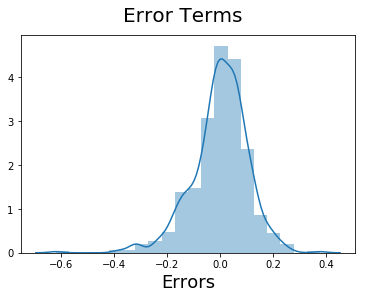

In [123]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

We can see that the error terms satisfy the assumption of normality as its mean is around 0

In [125]:
print(X_train_lm.shape)
print(res.shape)

(584, 15)
(584,)


In [126]:
# Scaling the test data
num_vars = ['atemp','hum','windspeed','cnt']
days_test[num_vars] = scaler.fit_transform(days_test[num_vars])

In [127]:
# Creating x and y sets
Y_test = days_test.pop('cnt')
X_test = days_test

In [128]:
X_train_new=X_train_lm.drop(['const'], axis=1)

#### Making predictions on the test set

In [129]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [130]:
X_train_lm.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                'windspeed',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10,
                                          7,
                                   'Monday',
                                  'Tuesday'],
      dtype='object')

In [131]:
X_test_new.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                'windspeed',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10,
                                          7,
                                   'Monday',
                                  'Tuesday'],
      dtype='object')

In [132]:
#Making predictions on the chosen model
y_pred = lr_18.predict(X_test_new)

Text(0,0.5,'y_pred')

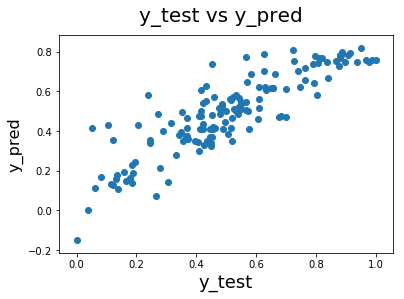

In [133]:
# Checking predictied vs test data 
fig = plt.figure()
plt.scatter(Y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)  

### The model we have seems good enough to predict demand of bikes. The actual and predicted demand is significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

### Calculating the R2 score for the model

In [134]:
# Importing necessary packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [135]:
# Returns the mean squared error, we take a square root
np.sqrt(mean_squared_error(Y_test, y_pred))

0.115754761735186

In [136]:
# Calculate the r square for test
r_squared = r2_score(Y_test, y_pred)
r_squared

0.7544728008095782

In [137]:
X_t=X_train_new.iloc[:,0].values

#### Checking assumption of homoscedasticity and autocorrelation

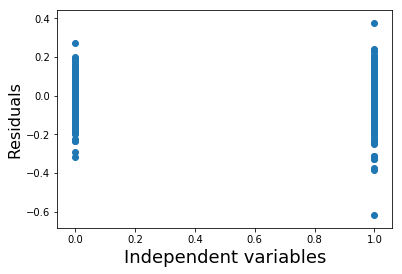

In [138]:
# PLotting the residuals to see if a pattern exists
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)
plt.xlabel('Independent variables', fontsize=18)
plt.ylabel('Residuals', fontsize=16)  
plt.show()

### When we have time series data (e.g. yearly data), the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [139]:
X_train_new.head()

,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,3,5,6,8,9,10,7,Monday,Tuesday
367,1,0,0.695175,1,0,0,0,0,0,0,0,0,0,0
648,1,0,0.299450,0,0,0,0,0,0,0,1,0,0,0
44,0,0,0.807474,1,0,0,0,0,0,0,0,0,0,0
705,1,0,0.189819,0,0,0,0,0,0,0,0,0,0,0
379,1,0,0.449210,1,0,0,0,0,0,0,0,0,0,1


In [140]:
X_train_lm.columns
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     143.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.38e-176
Time:                        22:48:41   Log-Likelihood:                 483.11
No. Observations:                 584   AIC:                            -936.2
Df Residuals:                     569   BIC:                            -870.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4235      0.014     29.853      0.000       0.396       0.451
yr                                     0.2436      0.009     27.366      0.000       0.226       0.261
holiday                               -0.0774      0.028     -2.809      0.005      -0.132      -0.023
windspeed                             -0.1284      0.027     -4.677      0.000      -0.182      -0.074
spring                                -0.2017      0.013    -15.789      0.000      -0.227      -0.177
Light rain_Light snow_Thunderstorm    -0.2832      0.028    -10.214      0.000      -0.338      -0.229
3                                      0.0761      0.017      4.590      0.000       0.044       0.109
5                                      0.1114      0.018      6.285      0.000       0.077       0.146
6                                      0.1694      0.019      9.144      0.000       0.133       0.206
8                                      0.1459      0.018      8.336      0.000       0.112       0.180
9                                      0.1787      0.018      9.774      0.000       0.143       0.215
10                                     0.1213      0.017      6.980      0.000       0.087       0.155
7                                      0.1427      0.019      7.631      0.000       0.106       0.179
Monday                                -0.0324      0.013     -2.587      0.010      -0.057      -0.008
Tuesday                               -0.0337      0.012     -2.727      0.007      -0.058      -0.009
==============================================================================
Omnibus:                       91.332   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.491
Skew:                          -0.800   Prob(JB):                     3.27e-51
Kurtosis:                       5.644   Cond. No.                         9.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see that the equation for best fitted line is:¶
#### cnt = (0.2436 X yr) - (0.0774 X holiday) - (0.2017 X Spring) - (0.2832 X Light rain_Light snow_Thunderstorm) - (0.1284 X windspeed) + (0.0761 X 3) + (0.1114 X 5) + (0.1694 X 6) + (0.1459 X 8) + (0.1787 X 9) + (0.1213 X 10) + (0.1427 X 7) - (0.0324 X Monday) - (0.0337 X Tuesday)

#### From the model we can infer the following points:
1. We can see the demand for bikes depends mainly on below variables:
    yr, holiday, spring, windspeed, Light rain_Light snow_Thunderstorm, 3, 5, 6, 8, 9, 7, 10, Monday and Tuesday
2. Demands increases in the months of 3, 5, 6, 7, 8, 9, 10
3. Demand decreases if it is a holiday, spring, Light rain_Light snow_Thunderstorm

#### Final recommendations for the company:
Demand is higher in months of 3, 5, 6, 7, 8, 9 and 10